<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L07%20Neural%20Networks%20Train_solved.ipynb)

# Labor 07 - Training of a neural Network

### Handwritten numbers III.
In this exercise we will train our neural network to recognise handwritten digits from 0 to 9.

### 1: Imports and Load Data
Import the package you want to use and read the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### 2: Data load

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [2]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab07/Lab7data.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab07/Lab7weights.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab07/nnC_history_800.txt
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab07/w1_final.txt
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab07/w2_final.txt

--2024-12-10 22:01:24--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab07/Lab7data.mat
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab07/Lab7data.mat [following]
--2024-12-10 22:01:25--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab07/Lab7data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7511764 (7.2M) [application/octet-stream]
Saving to: ‘Lab7data.mat’

Lab7data.mat        100%[===================>]   7.16M  --.-KB/s    in 0.08s   

2024-12-10 22:01:25 (87.2 MB/s) - ‘Lab7data.mat’ saved

Load in the data! Use the Pandas package to do this and then convert it into a numpy array.

In [3]:
data = loadmat("Lab7data.mat")
X = data["X"]
y = data ["y"]
del data
m = X.shape[0]
print('Shape of X and y in order:')
print(X.shape)
print(y.shape)

data = loadmat("Lab7weights.mat")
w1 = np.array(data["Theta1"])
w2 = np.array(data["Theta2"])
print('Shape of w1 and w2 in order:')
print(w1.shape)
print(w2.shape)
del data

Shape of X and y in order:
(5000, 400)
(5000, 1)
Shape of w1 and w2 in order:
(25, 401)
(10, 26)


Consideration in connection with the data:
- The samples are sorted into a 5000x400 matrix, which means that we have 5000 20x20 pixel images. The images are stored expanded in the matrix.
- As an output, we expect a number, which are stored in a 5000x1 vector.
- The weight matrices required for the network to work are 25x401 and 10x26 respectively. This means that our initial input parameter space of 400 is augmented with the BIAS and the hidden layer contains 25 neurons.
- The BIAS is also appended to the hidden layer and thus creates the connection between the second weight vector of 26 hidden neurons and the 10 possible outputs.

In terms of the operation of the neural network, we will consider the probability of an element belonging to one of the 10 classes, of which we will choose the largest (MaxPooling) to determine the final number.

### 3: Visualization

Visualize the date for a better understanding.

Printing some random data ...


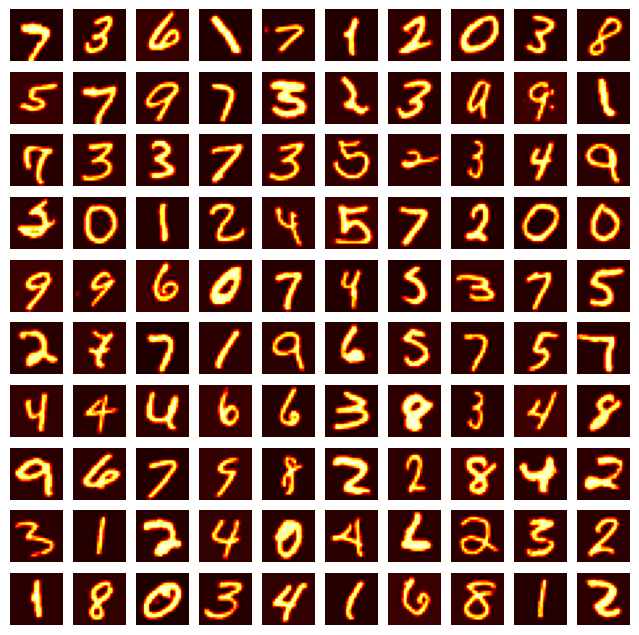

In [4]:
print("Printing some random data ...")
fig, ax = plt.subplots(10,10, figsize =(8,8))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[np.random.randint(0,m+1),:].reshape(20,20, order = "F"), cmap="hot")
        ax[i,j].axis("off")
plt.show()

### 4. Mathematical background

For a better understanding, consider the simplified example below.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab07/Pics/L07_Network.png?raw=1" width="550">

The outlined neural network consists of 3 layers.
- Input layer containing 2 input neurons plus the added BIAS.
- Hidden layer containing 3 neurons plus the assigned BIAS.
- Output layer containing 3 neurons, the maximum of which is selected to get the actual output.

In terms of the role of neurons, the treatment of BIAS neurons is slightly different. Since BIAS is not a variable, but a constant value of 1, so that the associated weight can be an independent parameter. Accordingly, it only has a role in weight injection and can be assigned to each layer as required.

In terms of indexes introduce the following: <br>
$a^{(j)}_{i}$ - activation of the $i^{th}$ neuron in the $j^{th}$ layer <br>
$s^{(j)}_{i}$ - summed output of the $i^{th}$ neuron in the $j^{th}$ layer <br>
$w^{(j)}_{lk}$ - weight between the $l^{th}$ neuron in the $j^{th}$ layer and the $k^{th}$ neuron in the $j+1^{th}$ layer  <br>
$x^{(m)}_{n}$ - the $n^{th}$ feauture in the $m^{th}$ input. ($x^{(1)}_0 = 1)$ is the BIAS.<br>
$\hat y$ - the output

The forward step can therefore be structured as follows: <br>
The BIAS is added to the $x^{(1)}$ vector and multiplied by the first weight matrix.

$ \underset{1\times 3}{\mathrm{x^{(1)}}} \times \underset{3\times 3}{\mathrm{w^{(1)}}} = \underset{1\times 3}{\mathrm{s^{(2)}}} $

We perform the activation in the neurons of the hidden layer. We use the sigmoid function as activation function.

$ \underset{\color{red}{1\times 3}}{\mathrm{a^{(2)}}} = f(\underset{1\times 3}{\mathrm{s^{(2)}}}) = sigmoid(\underset{1\times 3}{\mathrm{s^{(2)}}}) $

We assign the BIAS to the hidden layer after the activation, but before the weight is applied!

$ \underset{\color{red}{1\times 4}}{\mathrm{a^{(2)}}} \times \underset{4\times 3}{\mathrm{w^{(2)}}} = \underset{1\times 3}{\mathrm{s^{(3)}}}  $

After activation the value of the neurons in the output layer is obtained.

$ \underset{1\times 3}{\mathrm{a^{(3)}}} = f(\underset{1\times 3}{\mathrm{s^{(3)}}}) = sigmoid(\underset{1\times 3}{\mathrm{s^{(3)}}}) $

The output layer contains the predictions.

$ \underset{1\times 3}{\mathrm{\hat{y}}} = \underset{1\times 3}{\mathrm{a^{(3)}}} $

In a classification problem, the final prediction is obtained by selecting the maximum, i.e. the most likely group.

#### Cost function

We use the well-established MSE (Mean Square Error) method as a cost function. Let's see how the error calculation is for an output neuron. Ignoring the BIASs, let us focus only on the connections shown in dark color in the figure. <br>

$ C = \sum\{\frac{1}{2}(y-\color{red}{\hat y})^2 \} $

$ C = \sum\{\frac{1}{2}(y-{\color{red}{a^{(3)}}})^2 \} $

$ C = \sum\{\frac{1}{2}(y-f({\color{red}{s^{(3)}}}))^2\} $

$ C = \sum\{\frac{1}{2}(y-f({\color{red}{a^{(2)}}}w^{(2)}))^2\} $

$ C = \sum\{\frac{1}{2}(y-f(f({\color{red}{s^{(2)}}})w^{(2)}))^2\}$

$ C = \sum\{\frac{1}{2}(y-f(f(xw^{(1)})w^{(2)}))^2\} $

The error calculation can therefore be reduced to a function of the input variables and the weights in the mesh. The formula can be applied to any number of layers.

#### Back Propagation

The error back propagation is used to calculate the extent to which each neuron is responsible for the error, starting from the output layer and working backwards. In practice, we need to perform half of the steps used to calculate the cost function backwards, which means we need the derivative of the activation function. <br>

##### Sigmoid function and its derivative

$g(z) = \frac{1}{1+e^{-z}}$ <br>
$
\begin{split}
g'(z) =
& = \frac{d}{dz}\frac{1}{1+e^{-z}} \\
& = \frac{1}{(1+e^{-z})^2}(e^{(-z)}) \\
& = \frac{1}{1+e^{-z}}(1-\frac{1}{(1+e^{-z})}) \\
& = g(z)(1-g(z))
\end{split}
$

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab07/Pics/L07_SigmoidDeriv.png?raw=1" width="400">

Back propagation of the error is used to derive the error rate in the neurons of the hidden layer by parsimoniously deriving the cost function according to the elements of the corresponding weight matrix.

$ \begin{split}
\frac{\partial C}{\partial w^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial w^{(2)}} = \sum (\frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial w^{(2)}})
\end{split}$

For the sake of clarity, let's derive the derivation for one element. <br>

$
\begin{split}
\frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial w^{(2)}}
& = (y-\hat{y})(-\frac{\hat{y}}{\partial w^{(2)}}) \\
& = -(y-\hat{y}) \cdot \frac{\partial \hat{y}}{\partial s^{(3)}}\cdot \frac{\partial 	s^{(3)}}{\partial w^{(2)}}\\
& = \color{red}{-(y-\hat{y}) \cdot f'(s^{(3)})}\cdot
\frac{\partial a^{(2)}w^{(2)}}{\partial w^{(2)}}\\
& = {\color{red} {\delta^{(3)}}\cdot a^{(2)}}
\end{split}
$<br>

Introduce $ \delta^{(j)}_{i} $ as the error term assigned to neuron i of layer j. <br>
Extended in matrix form, after checking the dimensions, we obtain the following relation: <br>
$ (a^{(2)})^T \delta^{(3)} $


#### Training

During the teaching phase, we modify the weights using the Gradient Descent method as previously described. To modify the weights, we define a learning rate $(\mu)$ and optionally specify a penalty term. <br>

$ w^{(1)} = w^{(1)} - \mu \frac{\partial C}{w^{(1)}}+ regularization $

$ w^{(2)} = w^{(2)} - \mu \frac{\partial C}{w^{(2)}}+ regularization $

#### Algorithm steps

Let's summarise the steps to implement the algorithm

1, $\hspace{2mm} xw^{(1)} = s^{(2)} $

2, $\hspace{14mm} f(s^{(2)}) = a^{(2)}$

3, $\hspace{32mm} a^{(2)} w^{(2)} = s^{(3)} $

4, $\hspace{48mm} f(s^{(3)}) = \hat{y} $

5, $\hspace{2mm} C = \sum\{\frac{1}{2}(y-\hat y)^2 \} $

6, $\hspace{2mm} -(y-\hat{y}) \cdot f'(s^{(3)}) = \delta^{(3)} $

7, $\hspace{28mm} (a^{(2)})^T \delta^{(3)} =  \frac{\partial C}{\partial w^{(2)}} $

8, $\hspace{39mm} \delta ^{(3)} \cdot (w^{(2)})^T \cdot f'(s^{(2)})= \delta ^{(2)} $

9, $\hspace{78mm} x^T \delta^{(2)} =  \frac{\partial C}{\partial w^{(1)}} $

10, $\hspace{2mm} w^{(1)} = w^{(1)} - \mu \frac{\partial C}{w^{(1)}}+ regularization $

$\hspace{8mm}w^{(2)} = w^{(2)} - \mu \frac{\partial C}{w^{(2)}}+ regularization $

### 5: Parameter preparation

In [5]:
Lambda = 1                                              # Level of penalty
input_layer_size = 400                                  # Input layer size
hidden_layer_size = 25                                  # Hidden layer size
num_labels = 10                                         # Number of Labels
nn_params = np.append(w1.flatten(), w2.flatten())       # Flatten and concatanete w1 and w2

Tracing the architecture is more transparent if the neuron numbers of each layer are stored without the BIAS members. And the weights are stored in an expanded variable. The matrix sizes can be reset based on the neuron numbers of each layer. We will also need the learning rate as a preset parameter.

### 6: Cost function

Before implementing the cost function, we need an activation function and its derivative. Again, we choose the sigmoid function as the activation function.

In [6]:
def sigmoid(z):
    ################### CODE HERE ########################
    # Sigmoid function implemnetation
    g = 1 / (1 + np.exp(-z))

    ######################################################
    return g

def sigmoidGradient(z):
    ################### CODE HERE ########################
    # Implement the derivative of the sigmoid function as well
    g_deriv = sigmoid(z) * (1 - sigmoid(z))
    ######################################################
    return g_deriv

The cost function will receive as parameters the weight parameters, the layer sizes of the mesh, as well as the samples, the labels associated with the samples and the learning rate. Since the weight parameters are passed to the function in a variable, we need to return the corresponding matrix dimensions for the weight matrices within the function.

##### One Hot Encoding

To adapt the neural network to the output, we will need to do some more tweaking. The labels of the samples are given by a number, but we are working on a 10-group classification problem. Accordingly, we will have 10 output neurons, which will give us the probability that a given sample belongs to a given class. We will therefore determine the predicted class based on the maximum likelihood. And for this transformation we will use the One Hot Encoding method (only one 1). The essence of this method is to transform each label into a vector with the same number of elements as the number of classes and only one 1 in the column of the corresponding class.

Our original labels are the numbers 0 to 9 (left), and the corresponding transformed labels are the vectors of our transformed labels (right). Note that putting the vectors of the transformed labels together is very similar to a unit matrix.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab07/Pics/L07_OneHot.png?raw=1" width="300">

In [7]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    """
    Implements the neural network cost function for a two-layer neural network
    which performs classification.

    Args:
      nn_params: Unrolled parameters for the neural network.
      input_layer_size: Size of the input layer.
      hidden_layer_size: Size of the hidden layer.
      num_labels: Number of output units/classes.
      X: Input data matrix.
      y: Output data vector.
      Lambda: Regularization parameter.

    Returns:
      C: Cost of the neural network.
      grad: Gradient of the cost function.
    """
    # Reshape nn_params back into the parameters w1 and w2, the weight matrices
    # for our 2 layer neural network
    w1 = nn_params[:((input_layer_size + 1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size + 1)
    w2 = nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size + 1)

    m = X.shape[0]
    C = 0
    w1_grad = np.zeros((w1.shape))
    w2_grad = np.zeros((w2.shape))

    # Forward Step implementation
    # Add BIAS to every layer
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)  # Add bias to input layer
    z2 = a1.dot(w1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)  # Add bias to hidden layer
    z3 = a2.dot(w2.T)
    a3 = sigmoid(z3)  # Output layer (hypothesis)

    # ONE HOT ENCODING (y to Y)
    Y = np.zeros((m, num_labels))
    for i in range(m):
        Y[i, y[i] - 1] = 1  # Assuming y is 1-indexed

    # PenaltyPenalized cost function
    C = (1 / m) * np.sum(-Y * np.log(a3) - (1 - Y) * np.log(1 - a3))
    reg_term = (Lambda / (2 * m)) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))
    C += reg_term

    # Back Propagation
    d3 = a3 - Y  # Error in output layer
    d2 = d3.dot(w2[:, 1:]) * sigmoidGradient(z2)  # Error in hidden layer (excluding bias)

    w1_grad = (1 / m) * d2.T.dot(a1)
    w2_grad = (1 / m) * d3.T.dot(a2)

    # Regularization of gradients
    w1_grad[:, 1:] += (Lambda / m) * w1[:, 1:]
    w2_grad[:, 1:] += (Lambda / m) * w2[:, 1:]

    grad = np.append(w1_grad.flatten(), w2_grad.flatten())


    return C, grad

Let's check if the implemented function works as intended.

In [8]:
Lambda = 0
C, grad = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print("Cost at debugging parameters: %.6f \nFor Lambda = 0 it should be:  0.287629" % C)
Lambda = 3
C, grad = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print("Cost at debugging parameters: %.6f \nFor Lambda = 3 it should be:  0.576051" % C)

Cost at debugging parameters: 0.287629 
For Lambda = 0 it should be:  0.287629
Cost at debugging parameters: 0.576051 
For Lambda = 3 it should be:  0.576051


### 7: Initial weights

The initial weights are initialised with a uniform distribution over a defined interval. The weights thus start from a nonzero initial value, which allows convergence.

In [9]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out,L_in+1)*(2*epsilon_init)-epsilon_init
    return W

In [10]:
initial_w1 = randInitializeWeights(input_layer_size,hidden_layer_size)
initial_w2 = randInitializeWeights(hidden_layer_size,num_labels)
initial_nn_params = np.append(initial_w1.flatten(),initial_w2.flatten())

### 8: Gradient Descent

To train the neural network implement the gradient descent method.

In [11]:
def gradientDescentnn(X, y, initial_nn_params, lr_rate, num_iters, Lambda, input_layer_size, hidden_layer_size,
                      num_labels):

    w1 = initial_nn_params[:((input_layer_size + 1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size + 1)
    w2 = initial_nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size + 1)

    m = len(y)
    C_history = []

    for i in range(num_iters):
        if (i%20==0):
            print('Iteration:', i+1)
        elif (i==num_iters-1):
            print('Done!')

        nn_params = np.append(w1.flatten(), w2.flatten())
        C, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

        w1_grad = grad[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
        w2_grad = grad[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

        w1 = w1 - (lr_rate * w1_grad)
        w2 = w2 - (lr_rate * w2_grad)
        C_history.append(C)

    nn_paramsFinal = np.append(w1.flatten(), w2.flatten())
    return nn_paramsFinal, C_history

In [12]:
# Training parameters
lr_rate = 0.9
num_iter = 400
Lambda = 0.1

nnw, nnC_history = gradientDescentnn(X,y,initial_nn_params,lr_rate,num_iter,Lambda,input_layer_size,hidden_layer_size,num_labels)
w1 = nnw[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
w2 = nnw[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

Iteration: 1
Iteration: 21
Iteration: 41
Iteration: 61
Iteration: 81
Iteration: 101
Iteration: 121
Iteration: 141
Iteration: 161
Iteration: 181
Iteration: 201
Iteration: 221
Iteration: 241
Iteration: 261
Iteration: 281
Iteration: 301
Iteration: 321
Iteration: 341
Iteration: 361
Iteration: 381
Done!


You can experiment with the parameters of the run (Lambda, learning rate, number of iterations).

To test the success of a given learning, implement a predictor function that performs the Forward Step and returns the result to its original form.

In [13]:
def predict(w1,w2,X):
    """
    Predicts the label of an input given a trained neural network.

    Args:
      w1: Weight matrix for the hidden layer.
      w2: Weight matrix for the output layer.
      X: Input data matrix.

    Returns:
      p: Predicted labels for the input data.
    """
    m = X.shape[0]

    # Implement the Forward step
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)  # Add bias to input layer
    z2 = a1.dot(w1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)  # Add bias to hidden layer
    z3 = a2.dot(w2.T)
    a3 = sigmoid(z3)  # Output layer (hypothesis)

    p = np.argmax(a3, axis=1) + 1  # Get the index of the maximum probability (add 1 for 1-based indexing)


    return p

Due to the small number of samples, the accuracy of the network is tested on the training data, i.e. how many of the total number of samples were correctly hit. The data are used as a basis to give the accuracy of the network as a percentage.

In [14]:
def accuracy(pred,y):
    acc = (np.mean(pred[:,np.newaxis]==y))*100
    return acc

In [15]:
pred = predict(w1,w2,X)
acc = accuracy(pred,y)

print('Training Set Accuracy after %.0f iteration (currently trained weights): %.2f %%' % (num_iter,acc))

w1_r = np.loadtxt("w1_final.txt")
w2_r = np.loadtxt("w2_final.txt")

pred_800 = predict(w1_r,w2_r,X)
acc_800 = accuracy(pred_800,y)
print('Training Set Accuracy after 800 iteration (loaded weights): %.2f %%' % acc_800)

Training Set Accuracy after 400 iteration (currently trained weights): 92.52 %
Training Set Accuracy after 800 iteration (loaded weights): 94.36 %


### 9: Run training

We examine the learning process by plotting the cost function per interaction.

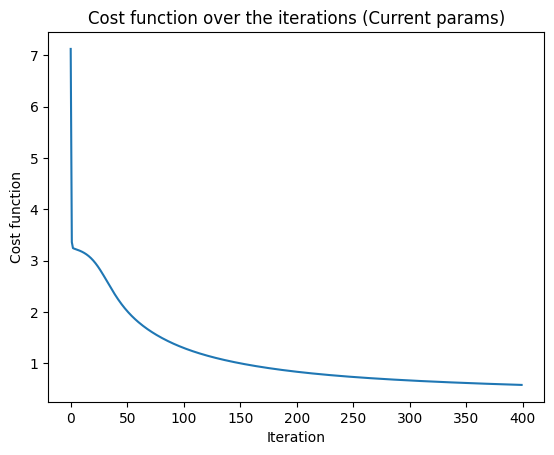

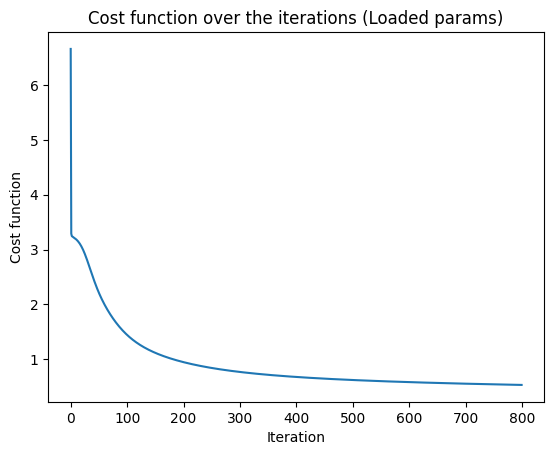

In [16]:
plt.plot(nnC_history)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Cost function over the iterations (Current params)')
plt.show()

nnC_history_load=np.loadtxt("nnC_history_800.txt")
plt.plot(nnC_history_load)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Cost function over the iterations (Loaded params)')
plt.show()

## Implementation with high level packages

With Keras (or Tensorflow) packages, the procedures described in detail above can be implemented as simpler and more compact code. The functions are optimized. Let's see how the example above can be implemented more concisely.

In [20]:
# imports for array-handling and plotting
import numpy as np
import matplotlib.pyplot as plt

# keras imports for the dataset and building our neural network
!pip install tensorflow # Install tensorflow if you don't have it
from tensorflow import keras
from keras.layers import Dense, Activation # Import directly from keras.layers


Create a model. Define layers, neuron numbers and activation functions.

In [21]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(400, input_shape=(400,)))
model.add(Activation('sigmoid'))

model.add(Dense(25))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Define cost function

In [22]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Starting from the original data, the One Hot recoding is also required here.

In [23]:
Y = np.zeros((m, num_labels))
I = np.eye(num_labels)

for i in range(1, m+1):
    Y[i-1, :] = I[y[i-1]-1, :]

Train the neural network and extract metrics.

In [24]:
# training the model and saving metrics in history
history = model.fit(X, Y, epochs=20, verbose = 2)

Epoch 1/20
157/157 - 5s - 30ms/step - accuracy: 0.5164 - loss: 1.8025
Epoch 2/20
157/157 - 2s - 10ms/step - accuracy: 0.8144 - loss: 1.0690
Epoch 3/20
157/157 - 1s - 3ms/step - accuracy: 0.8774 - loss: 0.7093
Epoch 4/20
157/157 - 1s - 4ms/step - accuracy: 0.9028 - loss: 0.5255
Epoch 5/20
157/157 - 1s - 4ms/step - accuracy: 0.9104 - loss: 0.4276
Epoch 6/20
157/157 - 1s - 4ms/step - accuracy: 0.9214 - loss: 0.3654
Epoch 7/20
157/157 - 1s - 3ms/step - accuracy: 0.9278 - loss: 0.3194
Epoch 8/20
157/157 - 1s - 4ms/step - accuracy: 0.9316 - loss: 0.2864
Epoch 9/20
157/157 - 1s - 4ms/step - accuracy: 0.9384 - loss: 0.2595
Epoch 10/20
157/157 - 1s - 4ms/step - accuracy: 0.9416 - loss: 0.2360
Epoch 11/20
157/157 - 1s - 4ms/step - accuracy: 0.9462 - loss: 0.2165
Epoch 12/20
157/157 - 1s - 4ms/step - accuracy: 0.9508 - loss: 0.1985
Epoch 13/20
157/157 - 1s - 4ms/step - accuracy: 0.9530 - loss: 0.1847
Epoch 14/20
157/157 - 1s - 3ms/step - accuracy: 0.9580 - loss: 0.1704
Epoch 15/20
157/157 - 1s - 

Checking the execution of a training using the extracted metrics.

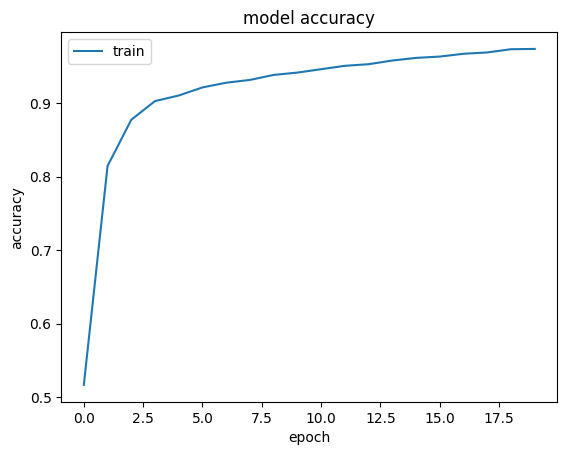

In [26]:
# plotting the metrics
fig = plt.figure()
plt.plot(history.history['accuracy']) # Change 'acc' to 'accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])

<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>